## Part 2 of case study : Logistic Regression using PCA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


%matplotlib inline

In [2]:
#importing Telecom churn dataset

data=pd.read_csv('C://Users//mohit//Downloads//Mohit Data Science//Case sudy Telecom//telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Data Cleaning

In [4]:
#check missing percentage
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
dtype: float64

In [5]:
#Removing columns with missing percentage more than 50% as wrond imputation will result in biasing which will also effect the model performance
data.drop(['count_rech_3g_6','fb_user_9','arpu_2g_9','max_rech_data_9','arpu_3g_9','total_rech_data_9','av_rech_amt_data_9','count_rech_3g_9','count_rech_2g_9','fb_user_8','av_rech_amt_data_7','max_rech_data_7','night_pck_user_7','total_rech_data_7','date_of_last_rech_data_7','night_pck_user_9','date_of_last_rech_data_9','av_rech_amt_data_8','count_rech_3g_8','count_rech_2g_8','date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','count_rech_2g_6','date_of_last_rech_data_6','av_rech_amt_data_6','max_rech_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','arpu_3g_7','count_rech_2g_7','fb_user_7','count_rech_3g_7','arpu_2g_7'],inplace=True,axis=1)


In [6]:
#removing date related columns as it won't be of any use

data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1,inplace=True)

In [7]:
# for columns with missing percentage 1-10% we can use fancy impute , so applying same for rest of the columns 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_columns=data.columns

Ii=IterativeImputer(min_value=0)
data2=pd.DataFrame(Ii.fit_transform(data))
data2.columns=data_columns
data2.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,138.796257,146.191968,0.00,140.284168,194.584797,185.882543,0.00,181.640166,134.931247,126.075545,0.00,123.153915,272.913998,261.608912,0.00,263.194531,47.100716,39.586374,0.00,37.95025,4.237074,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.542741,0.00,0.00,0.383028,50.070227,41.714172,0.00,38.683738,79.829327,82.666005,0.00,79.532442,7.381983,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,82.763856,79.235695,0.00,77.406563,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,47.922531,47.991152,0.16,46.289605,66.597893,69.762996,4.13,69.370838,0.00,0.00,1.15,0.00,98.016243,99.733345,5.44,98.65715,9.575939,10.012161,0.00,9.431833,6.74289,7.924708,0.00,5.202899,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58
1,7.001866e+09,109.0,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.560000,7.68,18.34000,11.510000,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.000000,2.91,0.00,0.000000,35.390000,150.5

In [8]:
#check missing percentage
percent_missing = (data2.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

sep_vbc_3g          0.0
loc_og_mou_9        0.0
std_og_mou_9        0.0
std_og_mou_8        0.0
std_og_mou_7        0.0
std_og_mou_6        0.0
std_og_t2c_mou_9    0.0
std_og_t2c_mou_8    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_6    0.0
dtype: float64

In [9]:
### There are no missing values present in Dataset now

In [10]:
# Removing columns which have just 1 unique value 

col_drop=data2.loc[:,data2.apply(pd.Series.nunique)==1]
col_drop.head(5)


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data2.drop(col_drop.columns,axis=1,inplace=True)

In [12]:
data2.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7.000843e+09,197.385,214.816,213.803,21.100,138.796257,146.191968,0.00,140.284168,194.584797,185.882543,0.00,181.640166,134.931247,126.075545,0.00,123.153915,272.913998,261.608912,0.00,263.194531,47.100716,39.586374,0.00,37.95025,4.237074,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.542741,0.00,0.00,0.383028,50.070227,41.714172,0.00,38.683738,79.829327,82.666005,0.00,79.532442,7.381983,0.00,0.00,0.00,0.00,0.00,0.00,0.0,82.763856,79.235695,0.00,77.406563,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,47.922531,47.991152,0.16,46.289605,66.597893,69.762996,4.13,69.370838,0.00,0.00,1.15,0.00,98.016243,99.733345,5.44,98.65715,9.575939,10.012161,0.00,9.431833,6.74289,7.924708,0.00,5.202899,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58
1,7.001866e+09,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.560000,7.68,18.34000,11.510000,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.000000,2.91,0.00,0.000000,35.390000,150.510000,299.54,72.110000,0.230000,4.110000,0.00,0.000000,0.000000,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.230000,4.580000,0.13,0.000000,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.610000,29.910000,29.23,116.090000,17.480000,65

In [13]:
### Finding HIGH VALUE CUSTOMERS based on good phase data i.e. June and July

In [14]:
#Deriving newcolumn with average of total recharge amount in june and july

data2['avg_rech_6_7']=(data2['total_rech_amt_6']+data2['total_rech_amt_7'])/2
data2['avg_rech_6_7'].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_rech_6_7, dtype: float64

In [15]:
#Let's find out the 70th percent of avg_rech_6_7
avg_70_6_7 = np.percentile(data2['avg_rech_6_7'], 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', avg_70_6_7)


70 percentile of 6th and 7th months avg recharge amount:  368.5


In [16]:
#Trimming dataset with entries of customer whose average is => 737 those will be high value customer

data_hvc = data2[data2['avg_rech_6_7']>= avg_70_6_7]
print('Dataframe Shape after filtering HIgh Value Customers: ', data_hvc.shape)

Dataframe Shape after filtering HIgh Value Customers:  (30011, 167)


In [17]:
#Checking and dropping the highly correlated variables

corr_mat=data_hvc.corr()
corr=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr=corr.abs().unstack().reset_index()
corr.columns=['VAR1','VAR2','CORR']
corr.dropna(subset=['CORR'],inplace=True)
corr.sort_values(['CORR'],ascending=False,axis=0,inplace=True)
corr.head(20)

,VAR1,VAR2,CORR
21212,total_rech_amt_8,arpu_8,0.953725
21380,total_rech_amt_9,arpu_9,0.947383
9911,isd_og_mou_8,isd_og_mou_7,0.941347
20876,total_rech_amt_6,arpu_6,0.941256
21044,total_rech_amt_7,arpu_7,0.937114
9910,isd_og_mou_8,isd_og_mou_6,0.916058
9743,isd_og_mou_7,isd_og_mou_6,0.914963
18124,total_ic_mou_9,loc_ic_mou_9,0.894950
17620,total_ic_mou_6,loc_ic_mou_6,0.894661
27848,avg_rech_6_7,total_rech_amt_7,0.892365


In [18]:
drop_corr=['arpu_8','arpu_9','isd_og_mou_7','arpu_6','arpu_7','og_others_9','isd_og_mou_6','og_others_8','loc_ic_mou_6','total_rech_amt_7','loc_ic_mou_9','isd_og_mou_8','loc_ic_mou_8','total_rech_amt_6','mobile_number','loc_ic_mou_7','isd_og_mou_7','isd_og_mou_7','onnet_mou_8']
data_hvc.drop(drop_corr,axis=1,inplace=True)

In [19]:
data_hvc.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,57.84,54.68,139.771945,453.43,567.16,325.91,180.201148,16.23,33.49,31.64,137.612958,23.74,12.59,38.06,260.089392,51.39,31.38,40.28,37.949074,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,38.685385,4.30,23.29,12.01,79.534053,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,77.410146,0.0,4.50,0.00,6.50,0.00,0.00,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.289478,217.56,221.49,121.19,69.365727,152.16,101.46,39.53,0.00,36.89,11.83,30.39,9.431899,91.44,126.99,141.33,5.196231,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,413.69,351.03,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.710000,116.56,133.43,22.58,7.330000,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.460000,0.0,0.00,0.00,10.23,0.00,0.00,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.030000,57.58,13.98,15.48,17.340000,0.00,0.00,0.00,0.00,0.00,0.58,0.10,0.000000,22.43,4.08,0.65,13.530000,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,15.0,120.0,186.0,90.0,154.0,30.0,36.0,50.0,0.0,10.0,0.0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0
13,501.76,108.39,244.810000,413.31,119.28,482.46,214.060000,23.53,144.24,72.11

In [20]:
Q1 = data_hvc.quantile(0.01)
Q3 = data_hvc.quantile(0.99)
IQR = Q3 - Q1
data_hvc = data_hvc[(data_hvc >= Q1 - 1.5*IQR) & (data_hvc <= Q3 + 1.5*IQR)]


In [21]:
data_hvc.shape

(30011, 150)

In [22]:
#check missing percentage
percent_missing = (data_hvc.isnull().sum() / data_hvc.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

og_others_7         0.546466
isd_og_mou_9        0.536470
sachet_3g_8         0.339875
sachet_3g_7         0.333211
ic_others_8         0.326547
ic_others_6         0.316551
isd_ic_mou_9        0.303222
std_ic_t2t_mou_9    0.296558
sachet_3g_9         0.296558
std_ic_t2t_mou_6    0.289894
dtype: float64

In [23]:
# all columns related to 9th month
cols_9 = [col for col in data_hvc.columns if '_9' in col]
print(cols_9)


['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


### Deriving churn based on 9th month data i.e.
- if Sum of Calling min(og and ic) and Data Usage(2g and 3g)= 0 means Customer Churned
- Columns required - total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,total_ic_mou_9

In [24]:
data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [25]:
#Churned customers 

data_hvc['churn'] = np.where(data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0) 

In [26]:
data_hvc['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

In [27]:
# Removing all 9th month related columns 

column_9=['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']
data_hvc.drop(column_9,axis=1,inplace=True)

In [28]:
data_hvc.shape

(30011, 114)

In [29]:
# all columns related to 6th month
cols_6 = [col for col in data_hvc.columns if '_6' in col]
print(cols_6)


['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'avg_rech_6_7']


In [30]:
# all columns related to 7th month
cols_7 = [col for col in data_hvc.columns if '_7' in col]
print(cols_7)

['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'avg_rech_6_7']


In [31]:
#deriving new columns by taking avgerage of goodphase months(6 and 7) and keeping 8th month columns as it is considering it is part of action phase

In [32]:
data_hvc['avg_std_ic_mou_67']=(data_hvc['std_ic_mou_6']+data_hvc['std_ic_mou_7'])/2
data_hvc['avg_total_ic_mou_67']=(data_hvc['total_ic_mou_6']+data_hvc['total_ic_mou_7'])/2
data_hvc['avg_spl_ic_mou_67']=(data_hvc['spl_ic_mou_6']+data_hvc['spl_ic_mou_7'])/2
data_hvc['avg_isd_ic_mou_67']=(data_hvc['isd_ic_mou_6']+data_hvc['isd_ic_mou_7'])/2
data_hvc['avg_ic_others_67']=(data_hvc['ic_others_6']+data_hvc['ic_others_7'])/2
data_hvc['avg_total_rech_num_67']=(data_hvc['total_rech_num_6']+data_hvc['total_rech_num_7'])/2
data_hvc['avg_max_rech_amt_67']=(data_hvc['max_rech_amt_6']+data_hvc['max_rech_amt_7'])/2
data_hvc['avg_last_day_rch_amt_67']=(data_hvc['last_day_rch_amt_6']+data_hvc['last_day_rch_amt_7'])/2
data_hvc['avg_vol_2g_mb_67']=(data_hvc['vol_2g_mb_6']+data_hvc['vol_2g_mb_7'])/2
data_hvc['avg_vol_3g_mb_67']=(data_hvc['vol_3g_mb_6']+data_hvc['vol_3g_mb_7'])/2
data_hvc['avg_monthly_2g_67']=(data_hvc['monthly_2g_6']+data_hvc['monthly_2g_7'])/2
data_hvc['avg_sachet_2g_67']=(data_hvc['sachet_2g_6']+data_hvc['sachet_2g_7'])/2
data_hvc['avg_monthly_3g_67']=(data_hvc['monthly_3g_6']+data_hvc['monthly_3g_7'])/2
data_hvc['avg_sachet_3g_67']=(data_hvc['sachet_3g_6']+data_hvc['sachet_3g_7'])/2

data_hvc['avgonnet_mou_67']=(data_hvc['onnet_mou_7']+data_hvc['onnet_mou_7'])/2

data_hvc['avg_offnet_mou_67']=(data_hvc['offnet_mou_6']+data_hvc['offnet_mou_7'])/2
data_hvc['avg_roam_ic_mou_67']=(data_hvc['roam_ic_mou_6']+data_hvc['roam_ic_mou_7'])/2
data_hvc['avg_roam_og_mou_67']=(data_hvc['roam_og_mou_6']+data_hvc['roam_og_mou_7'])/2
data_hvc['avg_loc_og_t2t_mou_67']=(data_hvc['loc_og_t2t_mou_6']+data_hvc['loc_og_t2t_mou_7'])/2
data_hvc['avg_loc_og_t2m_mou_67']=(data_hvc['loc_og_t2m_mou_6']+data_hvc['loc_og_t2m_mou_7'])/2
data_hvc['avg_loc_og_t2f_mou_67']=(data_hvc['loc_og_t2f_mou_6']+data_hvc['loc_og_t2f_mou_7'])/2
data_hvc['avg_loc_og_t2c_mou_67']=(data_hvc['loc_og_t2c_mou_6']+data_hvc['loc_og_t2c_mou_7'])/2
data_hvc['avg_std_og_t2t_mou_67']=(data_hvc['std_og_t2t_mou_6']+data_hvc['std_og_t2t_mou_7'])/2
data_hvc['avg_std_og_t2m_mou_67']=(data_hvc['std_og_t2m_mou_6']+data_hvc['std_og_t2m_mou_7'])/2
data_hvc['avg_std_og_t2f_mou_67']=(data_hvc['std_og_t2f_mou_6']+data_hvc['std_og_t2f_mou_7'])/2
data_hvc['avg_std_og_mou_67']=(data_hvc['std_og_mou_6']+data_hvc['std_og_mou_7'])/2
data_hvc['avg_spl_og_mou_67']=(data_hvc['spl_og_mou_6']+data_hvc['spl_og_mou_7'])/2
data_hvc['avg_og_others_67']=(data_hvc['og_others_6']+data_hvc['og_others_7'])/2
data_hvc['avg_total_og_mou_67']=(data_hvc['total_og_mou_6']+data_hvc['total_og_mou_7'])/2
data_hvc['avg_loc_ic_t2t_mou_67']=(data_hvc['loc_ic_t2t_mou_6']+data_hvc['loc_ic_t2t_mou_7'])/2
data_hvc['avg_loc_ic_t2m_mo_67']=(data_hvc['loc_ic_t2m_mou_6']+data_hvc['loc_ic_t2m_mou_7'])/2
data_hvc['avg_loc_ic_t2f_mou_67']=(data_hvc['loc_ic_t2f_mou_6']+data_hvc['loc_ic_t2f_mou_7'])/2
data_hvc['avg_std_ic_t2t_mou_67']=(data_hvc['std_ic_t2t_mou_6']+data_hvc['std_ic_t2t_mou_7'])/2
data_hvc['avg_std_ic_t2m_mou_67']=(data_hvc['std_ic_t2m_mou_6']+data_hvc['std_ic_t2m_mou_7'])/2
data_hvc['avg_std_ic_t2f_mou_67']=(data_hvc['std_ic_t2f_mou_7']+data_hvc['std_ic_t2f_mou_7'])/2
data_hvc['avg_vbc_3g_67']=(data_hvc['jul_vbc_3g']+data_hvc['jun_vbc_3g'])/2

data_hvc.rename(columns={'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [33]:
data_hvc.shape

(30011, 150)

In [34]:
cols_67=['jun_vbc_3g','jul_vbc_3g','onnet_mou_6','sep_vbc_3g','offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6','onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7']

data_hvc.drop(cols_67,axis=1,inplace=True)

In [35]:
data_hvc.shape

(30011, 75)

In [36]:
data_hvc.columns

Index(['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'vbc_3g_8',
       'avg_rech_6_7', 'churn', 'avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       '

In [37]:
#Conevrt AON in Months
data_hvc['aon_mon'] = data_hvc['aon']/30
data_hvc.drop('aon', axis=1, inplace=True)
data_hvc['aon_mon'].head()


7     26.733333
8     10.500000
13    86.900000
16    17.033333
17    22.233333
Name: aon_mon, dtype: float64

In [38]:
data_final=data_hvc.dropna()

In [39]:
data_final.head()

,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,avg_rech_6_7,churn,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avgonnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mo_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_vbc_3g_67,aon_mon
7,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,6.50,350.16,27.31,121.19,39.53,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7.0,3638.0,1580.0,779.0,0.00,0.00,0.0,0.0,0.0,0.0,57.74,1185.0,1,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,54.68,510.295,24.860,18.165,41.385,378.005,58.635,0.0,13.795,40.825,13.37,68.000,2.25,0.000,548.385,45.200,219.525,126.810,24.360,109.215,34.24,19.060,26.733333
8,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.48,0.00,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14.0,120.0,30.0,10.0,0.03,11.94,0.0,3.0,0.0,0.0,21.03,519.0,0,13.545,66.175,0.000,0.000,0.000,20.0,122.0,25.0,178.0,375.475,0.5,0.5,0.0,0.0,351.03,87.645,0.000,0.000,257.360,75.770,0.000,0.0,124.995,11.865,0.00,136.870,0.00,0.000,470.010,16.840,35.780,0.000,0.290,13.255,0.00,516.405,10.500000
16,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.16,32.71,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2.0,160.0,130.0,130.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,459.0,0,119.860,373.210,0.000,0.000,0.000,8.0,110.0,100.0,0.0,0.000,0.0,0.0,0.0,0.0,74.01,263.015,1.415,8.870,53.885,209.640,2.240,0.0,5.235,43.750,0.00,48.990,1.63,0.000,316.410,56.385,188.250,8.695,73.715,45.880,0.00,12.170,17.033333
17,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.0,30.0,30.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,408.0,0,4.955,47.095,0.000,0.000,0.000,10.5,55.0,15.0,0.0,0.000,0.0,0.0,0.0,0.0,9.28,30.820,2.380,4.230,19.495,29.270,0.000,0.0,573.860,0.775,0.00,574.635,1.29,0.465,625.170,17.270,24.860,0.000,4.315,0.640,0.00,0.000,22.233333
21,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,1068.54,19.54,129.16,10.39,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27.0,718.0,50.0,50.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,640.0,0,62.985,169.490,0.000,0.000,0.000,24.0,50.0,25.0,0.0,0.000,0.0,0.0,0.0,0.0,132.11,827.305,0.000,0.000,5.320,89.870,0.375,0.0,111.935,737.050,0.00,848.990,0.00,0.000,944.565,6.335,96.430,3.725,10.020,52.960,0.00,0.000,24.000000


In [40]:
data_final.shape

(27863, 75)

In [41]:
data_hvc.columns

Index(['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8',
       'avg_rech_6_7', 'churn', 'avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_mon

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variable to X
X = data_final.drop('churn',axis=1)

# Putting response variable to y
y = data_final['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'vbc_3g_8',
       'avg_rech_6_7','avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67',
       'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67',
       'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mo_67',
       'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67',
       'avg_std_ic_t2m_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67']]=scaler.fit_transform(X_train[['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'vbc_3g_8',
       'avg_rech_6_7','avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67',
       'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67',
       'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mo_67',
       'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67',
       'avg_std_ic_t2m_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67']])

X_train.head()

,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,avg_rech_6_7,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avgonnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mo_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_vbc_3g_67,aon_mon
96807,-0.714595,-0.293521,-0.315725,-0.395527,-0.571568,-0.084928,0.040972,-0.616265,-0.449862,-0.463646,-0.209064,-0.613874,1.153964,-0.849211,-0.244989,-0.232467,1.044929,-0.362393,-0.098020,0.176112,-0.202501,-0.197356,-0.252015,-0.213942,-0.225097,-0.889740,0.446114,3.422515,4.619780,-0.229637,3.543669,-0.320525,-0.346147,1.602384,-0.186749,0.365740,0.298123,-0.385903,-0.430726,-0.437377,-0.224912,-0.277856,-0.877299,4.100026,6.102160,-0.318734,4.340513,-0.382681,-0.345568,1.736789,-0.233043,-0.673261,-0.754367,-0.313122,-0.33358,-0.375218,-0.690952,-0.224794,-0.257243,-0.529029,-0.387287,-0.236667,-0.629740,0.611707,-0.356677,-1.000975,-0.067454,-0.533126,0.751531,-0.406891,-0.245643,-0.242910,0.417769,-0.914243
92413,1.750673,-0.293521,-0.315725,-0.460486,0.419540,-0.383548,-0.296047,0.039902,-0.449862,-0.383038,-0.209064,-0.560063,-0.454012,0.843301,0.631357,5.275936,-0.398164,-0.291931,3.610401,-0.247712,2.659668,4.471322,-0.252015,-0.048799,0.619325,0.554431,5.092425,0.496028,0.882089,-0.284764,-0.353975,-0.320525,-0.346147,-0.304211,-0.186749,-0.347926,8.382467,0.129535,4.085876,-0.437377,0.764254,2.280853,2.005922,0.250106,0.993034,-0.335995,-0.387534,-0.382681,-0.345568,-0.343305,-0.233043,-0.640816,2.857463,-0.313122,-0.33358,-0.283906,2.501618,-0.409892,-0.379744,-0.506108,-0.542508,-0.236667,-0.722066,-0.522622,-0.356677,1.722018,2.713058,4.361681,-0.356490,-0.240376,0.301927,-0.242910,-0.365625,-0.990084
80171,-0.401621,-0.293521,-0.315725,-0.485576,0.145076,-0.309377,-0.296047,-0.164604,-0.449862,-0.463646,-0.209064,-0.613874,-0.424177,-0.655588,-0.522890,2.358025,-0.375223,-0.362393,-0.419837,-0.129836,-0.481170,1.197042,-0.252015,-0.213942,0.539221,-0.889740,-0.732935,-0.184071,0.307060,-0.284764,-0.353975,-0.320525,-0.346147,-0.304211,-0.186749,-0.347926,-0.703424,-0.494574,0.947850,-0.437377,-0.243295,0.053474,-0.637030,-0.436018,-0.473942,-0.335995,-0.387534,-0.382681,-0.345568,-0.343305,-0.233043,-0.655708,0.065671,-0.313122,-0.33358,-0.428796,1.195340,-0.269575,-0.244348,-0.529029,-0.549623,-0.084184,-0.740922,-0.488249,-0.356677,-0.409637,-0.408345,1.877110,-0.204555,-0.406891,-0.409054,-0.116669,-0.365625,0.961286
25140,-0.280963,-0.293521,-0.315725,-0.282564,-0.579773,-0.383548,-0.284152,-0.578452,0.014290,0.056249,-0.209064,0.045236,0.651471,-0.230206,-0.394967,-0.746035,-0.403124,-0.321470,-0.287574,-0.247712,-0.373102,-0.809297,-0.252015,-0.213942,-0.141656,1.554241,0.159806,-0.761125,-0.514411,-0.195994,1.239174,-0.320525,2.731275,-0.304211,-0.186749,-0.202616,-0.799380,-0.491051,-0.887101,-0.437377,-0.243295,-0.277856,0.444177,-0.546560,-0.726869,-0.023911,0.650038,-0.382681,0.705744,0.696742,-0.233043,-0.575645,-0.615044,-0.313122,-0.33358,-0.418116,-0.642372

In [45]:
X_test[['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'vbc_3g_8',
       'avg_rech_6_7','avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67',
       'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67',
       'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mo_67',
       'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67',
       'avg_std_ic_t2m_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67']]=scaler.transform(X_test[['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'vbc_3g_8',
       'avg_rech_6_7','avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67',
       'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67',
       'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mo_67',
       'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67',
       'avg_std_ic_t2m_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67']])



In [47]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [48]:
#first coponent of the first vector obtained from pca.components_
pca.components_

array([[ 1.77886076e-02, -1.64030304e-02, -3.44888420e-02, ...,
         9.70740467e-02,  1.17832201e-01,  1.31208232e-01],
       [ 2.67336962e-01, -3.11974871e-02, -2.83144579e-02, ...,
         1.77799580e-02, -6.13518354e-02, -2.41306358e-02],
       [ 2.32639173e-02,  7.35663672e-02,  7.73404677e-02, ...,
         1.31976793e-02,  2.70334151e-01, -4.47608746e-02],
       ...,
       [ 6.96627129e-06,  3.95468049e-08, -2.65949870e-07, ...,
         8.30502834e-07, -4.51182842e-07, -6.62170141e-07],
       [ 4.32630066e-06, -3.64836527e-07, -6.87481092e-07, ...,
         3.18791055e-07,  1.95165678e-07,  1.56889286e-06],
       [-5.76361678e-07, -4.96539582e-08, -4.34942795e-08, ...,
        -7.08329553e-08,  8.90861804e-08,  1.31379797e-07]])

In [49]:
#variance explained by the first principal component
pca.explained_variance_ratio_

array([1.09881822e-01, 1.01047713e-01, 6.21754967e-02, 5.34501565e-02,
       4.61028365e-02, 3.97552350e-02, 3.48397920e-02, 3.03246594e-02,
       2.86088703e-02, 2.58687985e-02, 2.55333104e-02, 2.46351357e-02,
       2.40077327e-02, 2.17987522e-02, 2.10772955e-02, 1.90357493e-02,
       1.73246027e-02, 1.67351511e-02, 1.59278056e-02, 1.47246262e-02,
       1.40867932e-02, 1.32431044e-02, 1.29416327e-02, 1.26446817e-02,
       1.18818003e-02, 1.18041872e-02, 1.09512752e-02, 1.05682522e-02,
       1.03850328e-02, 9.84843613e-03, 9.60394352e-03, 9.18970893e-03,
       8.25045384e-03, 8.11206675e-03, 7.42179861e-03, 7.33466383e-03,
       6.82263418e-03, 6.39489692e-03, 6.29776261e-03, 5.85588491e-03,
       5.47814385e-03, 5.03351089e-03, 4.78679704e-03, 4.66221177e-03,
       4.60159952e-03, 4.25279759e-03, 4.00121195e-03, 3.78120936e-03,
       3.57989599e-03, 3.53386803e-03, 3.44242773e-03, 3.23466465e-03,
       3.17503020e-03, 2.95753673e-03, 2.86123820e-03, 2.57105159e-03,
      

Text(0, 0.5, 'Cumulative Variance')

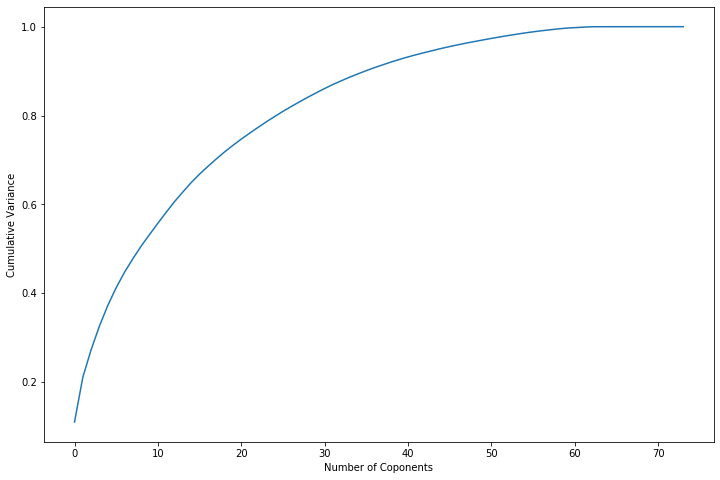

In [50]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

In [51]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([10.99, 21.09, 27.31, 32.66, 37.27, 41.25, 44.73, 47.76, 50.62,
       53.21, 55.76, 58.22, 60.62, 62.8 , 64.91, 66.81, 68.54, 70.21,
       71.8 , 73.27, 74.68, 76.  , 77.29, 78.55, 79.74, 80.92, 82.02,
       83.08, 84.12, 85.1 , 86.06, 86.98, 87.81, 88.62, 89.36, 90.09,
       90.77, 91.41, 92.04, 92.63, 93.18, 93.68, 94.16, 94.63, 95.09,
       95.52, 95.92, 96.3 , 96.66, 97.01, 97.35, 97.67, 97.99, 98.29,
       98.58, 98.84, 99.08, 99.3 , 99.51, 99.68, 99.79, 99.89, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99])

In [52]:
###Choosing the number of components as 3 as cummulative variance is above 90% at 3
### Running the PCA with the components choosed above

#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 36)


In [53]:


X_train_pca = pca_final.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca_final.transform(X_test)
print(X_test_pca.shape)


(19504, 36)
(8359, 36)


In [54]:
# Create a dataframe with the PCs obtained
pc  = pd.DataFrame(X_train_pca)
df_train_pca = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2],'PC4': pc[3], 'PC5':pc[4],'PC6':pc[5],'PC7': pc[6], 'PC8':pc[7],'PC9':pc[8],'PC10': pc[9], 'PC11':pc[10],'PC12':pc[11],'PC13': pc[12], 'PC14':pc[13],'PC15':pc[14],'PC16': pc[15], 'PC17':pc[16],'PC18':pc[17],'PC19': pc[18], 'PC20':pc[19],'PC21':pc[20],'PC22': pc[21], 'PC23':pc[22],'PC24':pc[23],'PC25': pc[24], 'PC26':pc[25],'PC27':pc[26],'PC28': pc[27], 'PC29':pc[28],'PC30':pc[29],'PC31': pc[30], 'PC32':pc[31],'PC33':pc[32],'PC34': pc[33], 'PC35':pc[34],'PC36':pc[35]})

In [55]:
df_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,4.043886,-2.594687,6.385819,-2.441661,-2.555714,0.655263,-1.548412,-0.492375,1.413466,1.506131,1.199654,0.478515,-1.456562,0.200202,-2.148182,-2.497939,-1.785347,1.214779,0.520936,-0.761621,2.388928,-0.719835,-0.100206,-0.960087,0.587748,-1.583027,-1.016264,-0.522489,-1.532634,2.097732,0.720661,0.168208,-0.044973,-2.083404,0.441614,0.038227
1,6.809253,7.759221,-0.997176,0.908279,1.291561,-1.604739,2.801896,-2.295217,0.161467,-3.400435,-1.234857,0.621330,-1.717621,-2.509425,0.342919,-2.653243,-1.481818,1.145849,-1.256488,-2.373402,-0.262284,-1.510285,-0.900936,0.136463,-1.065736,-0.299042,0.178983,-2.346836,-1.204994,2.173998,1.536952,1.335607,-3.276942,0.514658,0.388117,0.330333
2,1.533996,-1.407707,-2.445383,0.096778,-0.530824,-0.772333,-0.037914,-1.355796,0.201078,-1.049669,-0.484688,-0.196846,-1.530578,-0.918426,0.752352,-1.486426,0.076257,-0.169025,0.410678,0.066053,-0.831232,-0.297234,0.145460,0.164358,0.187535,0.028031,0.465631,0.030935,-0.096168,-1.170229,1.045206,0.373746,-0.252284,0.182247,0.173975,0.006274
3,-2.176817,-1.594311,0.453777,-0.817207,2.429522,-0.519138,-0.301775,0.111514,0.527158,1.190729,-0.999511,-0.370752,0.187264,0.426788,0.025060,0.287722,-1.500066,-0.366167,0.372897,0.059726,-0.249119,-0.175173,0.143544,-0.714829,0.433985,0.583521,-0.465849,0.204215,-0.631025,0.489848,-0.096501,-0.096950,0.348454,-1.044414,1.598145,-0.494946
4,-4.687656,1.606142,-0.101822,-0.772018,0.639280,3.899072,-0.348506,-0.021814,2.575761,-2.072785,1.250775,-0.335427,0.964720,-2.247275,-0.613839,0.265969,0.575946,2.231970,-0.810201,-2.010613,1.693087,-0.301326,-1.539794,0.084591,0.233193,-0.609746,-1.587098,1.341989,2.084124,-1.084982,-0.355393,-0.761285,-0.998361,0.179786,-1.919707,0.262651


In [57]:
#class imbalance
100*y_train.value_counts(normalize=True)

0    91.212059
1     8.787941
Name: churn, dtype: float64

In [58]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import time



# specify number of folds for k-fold CV
C=np.logspace(-5,8,15)
dual=[True,False]
max_iter=[100,110,120,130,140,150,160]

param_grid=dict(dual=dual,max_iter=max_iter,C=C)
# parameters to build the model on
# parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
logregg1 = LogisticRegression(penalty='l2',random_state=100)


# fit tree on training data
logreg_cv = GridSearchCV(logregg1, param_grid, 
                    cv=3, n_jobs=-1)

start_time=time.time()
random_result=logreg_cv.fit(df_train_pca, y_train)

print('Best: %f using %s' % (random_result.best_score_,random_result.best_params_))
print('Execution time: ' + str((time.time()-start_time))+'seconds')

Best: 0.930783 using {'C': 3.727593720314938, 'dual': True, 'max_iter': 150}
Execution time: 83.77989673614502seconds


In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced',dual=True,max_iter=150,penalty='l2',C=3.727593720314938)

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(df_train_pca, y_train)


In [61]:
from sklearn import metrics
from sklearn.metrics import classification_report


y_predd=rfe.predict(X_test_pca)
print('Accuracy :  {}'.format(metrics.accuracy_score(y_test,y_predd)))
print('Sensitivity :  {}'.format(metrics.recall_score(y_test,y_predd)))
print (classification_report(y_test,y_predd))

Accuracy :  0.8492642660605335
Sensitivity :  0.7741007194244605
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      7664
           1       0.33      0.77      0.46       695

    accuracy                           0.85      8359
   macro avg       0.65      0.82      0.69      8359
weighted avg       0.92      0.85      0.87      8359



In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [63]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predd, drop_intermediate = False )


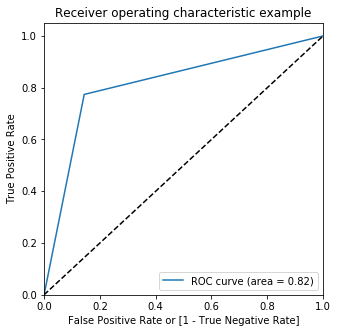

In [64]:
draw_roc(y_test, y_predd)

In [65]:
# from sklearn import metrics
# from sklearn.metrics import classification_report

# y_predd=rfe.predict(X_test)
# print('Accuracy :  {}'.format(metrics.accuracy_score(y_test,y_predd)))
# print('Sensitivity :  {}'.format(metrics.recall_score(y_test,y_predd)))
# print (classification_report(y_test,y_predd))

Result 
 -  Accuracy :  0.8492642660605335
 -  Sensitivity :  0.7741007194244605

In here we used 36 components, which could nearly explain 90% variance in dataset
We were able to achieve 82% Area under the curve on the test set